# Get datasets from Kaggle

In [2]:
import numpy as np
import pandas as pd
import os
import kaggle
import warnings
from pathlib import Path

from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import kaggle 

warnings.simplefilter('ignore')

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [6]:
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: 
    path = Path('./Data/house-prices-advanced-regression-techniques')
else:
    path = Path('house-prices-advanced-regression-techniques')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████| 199k/199k [00:00<00:00, 2.42MB/s]

In [4]:
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')
if iskaggle: 
    path = Path('./Data/titanic')
else:
    path = Path('titanic')
    if not path.exists():
        import zipfile,kaggle
        kaggle.api.competition_download_cli(str(path))
        zipfile.ZipFile(f'{path}.zip').extractall(path)

100%|██████████| 34.1k/34.1k [00:00<00:00, 947kB/s]

In [3]:
X = pd.read_csv('./titanic/train.csv')
display(X.head())
X = X.replace({'male':1, 'female':0})
y = X['Survived'].values
X.drop(columns = ['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X = pd.get_dummies(X,dummy_na=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

params = {'max_depth': 6, 'learning_rate': 0.001, 'n_estimators': 300, 'scale_pos_weight': 1}
features = ['Sex', 'Pclass', 'SibSp', 'Fare', 'Age']

model_xgb = XGBClassifier(**params, booster='gbtree',objective='binary:logistic', n_jobs=-1)
model_xgb.fit(X_train[features], y_train)
y_pred = model_xgb.predict_proba(X_test[features])[:,1]
print(f"ROC (X_train): {metrics.roc_auc_score(y_train, model_xgb.predict_proba(X_train[features])[:,1])}")
print(f"ROC (X_test): {metrics.roc_auc_score(y_test, y_pred)}")

X_test = pd.read_csv('./titanic/test.csv')
X_test = X_test.replace({'male':1, 'female':0})
passengerids = X_test['PassengerId']
X_test.drop(columns = ['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
X_test = pd.get_dummies(X_test,dummy_na=True)
display(X_test[features].head())
y_pred = model_xgb.predict(X_test[features])
pd.DataFrame.from_dict({'PassengerId': passengerids, 'Survived': y_pred}).to_csv('./titanic/submission.csv', index=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


ROC (X_train): 0.8928180511413839
ROC (X_test): 0.8594805194805194


,Sex,Pclass,SibSp,Fare,Age
0,1,3,0,7.8292,34.5
1,0,3,1,7.0000,47.0
2,1,2,0,9.6875,62.0
3,1,3,0,8.6625,27.0
4,0,3,1,12.2875,22.0


[0.805058   0.12544371 0.03372246 0.01644785 0.01932799]
Index(['Pclass', 'Sex', 'Age', 'Parch', 'SibSp'], dtype='object')


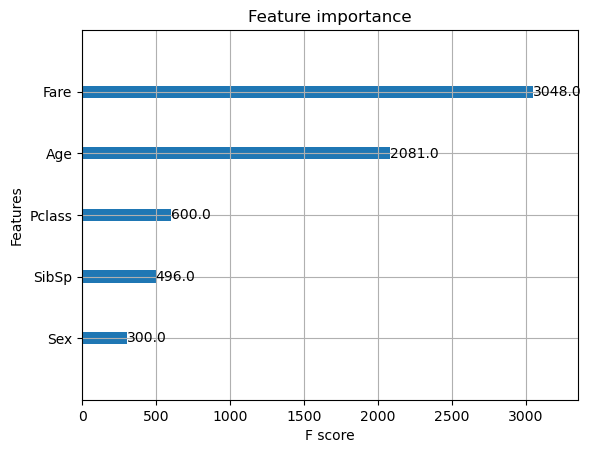

In [17]:
from xgboost import plot_importance

feature_importances = model_xgb.feature_importances_
print(feature_importances)
# Get indices of features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

# Select the top N features (e.g., top 10)
top_n_features = X_train.columns[sorted_indices[:10]]
print(top_n_features)

# plot the importances
plot_importance(model_xgb);

In [4]:
# https://www.kaggle.com/competitions/microsoft-malware-prediction/discussion/76245#448176 

# Make a Kaggle submission
kaggle.api.competition_submit(competition='titanic',
                              file_name='./titanic/submission.csv',
                              message=f"classifier = xbgoost; features = {features}; params = {str(params)}")

100%|██████████| 2.77k/2.77k [00:00<00:00, 3.79kB/s]


Successfully submitted to Titanic - Machine Learning from Disaster